In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install statsmodels


In [2]:
# Markkdwon A B Testing Project
# Simulate the data
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

C:\Users\sangw\AppData\Local\Temp\ipykernel_6780\2118999146.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Simulate Data
np.random.seed(42)
n_A,p_A=10_000,0.10 #Variant A: 10% true  conversion
n_B,p_B=10_000,0.12 #Variant B: 12% true  conversion

In [4]:
#Simulate number of purchases
success_A=np.random.binomial(n_A,p_A)
success_B=np.random.binomial(n_B,p_B)

In [5]:
def proportion_ci(successes,n,alpha=0.05):
    p_hat=successes/n
    z=stats.norm.ppf(1-alpha/2)
    se=np.sqrt(p_hat*(1-p_hat)/n)
    return p_hat,(p_hat - z * se),(p_hat + z *se)

p_A_hat, ci_low_A,ci_high_A=proportion_ci(success_A,n_A)
p_B_hat, ci_low_B,ci_high_B=proportion_ci(success_B,n_B)

results=pd.DataFrame({
    'Variant':['A','B'],
    'Visitors':[n_A,n_B],
    'Conversions':[success_A,success_B],
    'CR (p̂)':[p_A_hat,p_B_hat],
    'CI Lower (95%)':[ci_low_A,ci_low_B],
    'CI Upper (95%)':[ci_high_A,ci_high_B],
})
print(results)

  Variant  Visitors  Conversions  CR (p̂)  CI Lower (95%)  CI Upper (95%)
0       A     10000          973   0.0973        0.091491        0.103109
1       B     10000         1134   0.1134        0.107185        0.119615


In [6]:
# #Plot conversion Rates with Error Bars
# plt.figure(figsize=(6,4)) 
# plt.bar(
#     results['Variant'],
#     results['CR (p̂)'],
#     yerr=[
#         results['CR (p̂)'] - results['CI Lower(95%)'],
#         results['CI Upper (95%)'] - resultls['CR (p̂)'],
#     ],
#     capsize=5,
#     color=['skyblue','salmon']
# )
# plt.ylabel('Conversion Rate')
# plt.title('A/B Test: Conversion Rate with 95% CI')
# plt.ylim(0, max(results['CI Upper (95%)']) + 0.02)
# plt.show()

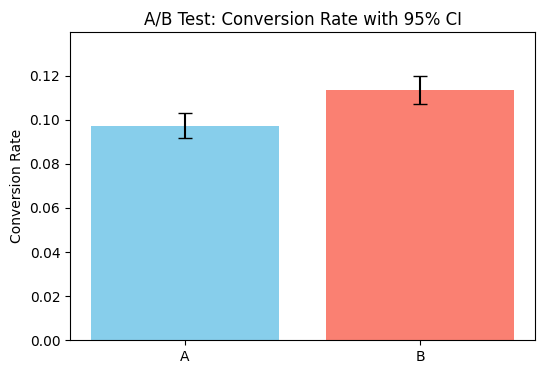

In [7]:


# Plot Conversion Rates with Error Bars
plt.figure(figsize=(6,4))
plt.bar(
    results['Variant'],
    results['CR (p̂)'],
    yerr=[
        results['CR (p̂)'] - results['CI Lower (95%)'],
        results['CI Upper (95%)'] - results['CR (p̂)']
    ],
    capsize=5,
    color=['skyblue', 'salmon']
)
plt.ylabel('Conversion Rate') 
plt.title('A/B Test: Conversion Rate with 95% CI')
plt.ylim(0, max(results['CI Upper (95%)']) + 0.02)
plt.show()


In [8]:
# Test H0: p_B <= p_A vs H1: p_B > p_A
count = np.array([success_B, success_A])
nobs = np.array([n_B, n_A])

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print(f" Z-statistic: {z_stat: .3f}")
print(f" p-value:     {p_value: .3f}")

if p_value < 0.05:
    print(" → Reject H0: Variant B has a significantly higher conversion rate.")
else:
    print("→ Fail to reject H0: No significant lift from B over A.")

 Z-statistic:  3.708
 p-value:      0.000
 → Reject H0: Variant B has a significantly higher conversion rate.


In [9]:
import numpy as np,matplotlib.pyplot as plt,time
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output

true_p_A,true_p_B=0.10,0.12
batch_size=100 #visitors per batch per variant
n_batches=60 #simulate 60 time steps(eg. minutes)

#initiate counters
n_visits_A=n_visits_B=0
n_success_A=n_success_B=0

#List to store metrices for plotting
batches=[]
p_value=[]
lifts=[]

 Batch 60/60
 Variant A: 6000 visits, 574 buys → CR = 9.567%
 Variant B: 6000 visits, 714 buys → CR = 11.900%
 Observed lift:  2.333%
 z-stat = 3.86, p-value = 0.0001
  → Significant lift detected (p<0.05).


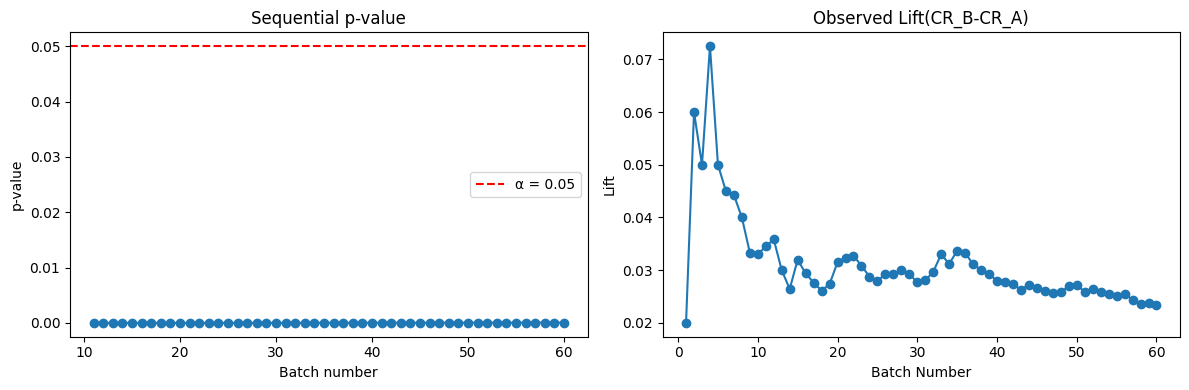

In [10]:
for batch in range(1,n_batches+1):
    #Simulate one batch of visitors 
    new_A=np.random.binomial(batch_size,true_p_A)
    new_B=np.random.binomial(batch_size,true_p_B)

    #Update totals
    n_visits_A +=batch_size
    n_visits_B +=batch_size
    n_success_A += new_A
    n_success_B += new_B
    
    #Compute current conversion rates
    cr_A=n_success_A/n_visits_A
    cr_B=n_success_B/n_visits_B
    lift=cr_B-cr_A

    #Two proportion z-test(one-sided:B > A)
    counts=np.array([n_success_B,n_success_A])
    nobs=np.array([n_visits_B,n_visits_A])
    z_stat,p_val=proportions_ztest(count,nobs,alternative='larger')

    #Record for plotting
    batches.append(batch)
    p_value.append(p_val)
    lifts.append(lift)



    # Clear previous output and print current stats
    clear_output(wait=True)
    print(f" Batch {batch}/{n_batches}")
    print(f" Variant A: {n_visits_A} visits, {n_success_A} buys → CR = {cr_A:.3%}")
    print(f" Variant B: {n_visits_B} visits, {n_success_B} buys → CR = {cr_B:.3%}")
    print(f" Observed lift: {lift: .3%}")
    print(f" z-stat = {z_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("  → Significant lift detected (p<0.05).")

    else:
        print("  → No significant lift yet.")

    # plot p-value and lift over batches
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].plot(batches, p_value, '-o')
    axes[0].axhline(0.05, color='red', linestyle='--', label='α = 0.05')
    axes[0].set_title('Sequential p-value')
    axes[0].set_xlabel('Batch number')
    axes[0].set_ylabel('p-value')
    axes[0].legend()

    axes[1].plot(batches,lifts,'-o')
    axes[1].set_title('Observed Lift(CR_B-CR_A)')
    axes[1].set_xlabel('Batch Number')
    axes[1].set_ylabel('Lift')

    plt.tight_layout()
    plt.show() 

    time.sleep(0.9)